### linear Regression models

### Use advertising data to build a model to predict sales based on  predictor variables

In [1]:
import pandas                       as     pd
import numpy                        as     np
import scipy.stats                  as     stats

import seaborn                      as     sns
import matplotlib.pyplot            as     plt
import matplotlib

matplotlib.rcParams.update({'font.size': 12})

import astropy.table                as     Table
import statsmodels.api              as     sm
import statsmodels.stats.api        as     sms
from   statsmodels.compat           import lzip

from   sklearn.cross_validation     import train_test_split
from   sklearn                      import model_selection

from   sklearn.linear_model         import LinearRegression
from   sklearn.linear_model         import Ridge
from   sklearn.linear_model         import Lasso
from   sklearn.tree                 import DecisionTreeRegressor

from   sklearn.neighbors            import KNeighborsRegressor
from   sklearn.svm                  import SVR

from   sklearn.model_selection      import GridSearchCV
from   sklearn.model_selection      import cross_val_score




from   sklearn.metrics              import mean_squared_error, mean_absolute_error
from   statsmodels.compat           import lzip
from   statsmodels.stats            import diagnostic as diag

from  statsmodels.stats.outliers_influence import variance_inflation_factor

D:\Python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
carseats_df       = pd.read_csv('D:/RRD/data/Carseats.csv', \
                                usecols = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',\
                                           'Age', 'Education','Sales'])
print(carseats_df.shape)
print(carseats_df.head().T)

(400, 8)
                 0       1       2      3       4
Sales          9.5   11.22   10.06    7.4    4.15
CompPrice    138.0  111.00  113.00  117.0  141.00
Income        73.0   48.00   35.00  100.0   64.00
Advertising   11.0   16.00   10.00    4.0    3.00
Population   276.0  260.00  269.00  466.0  340.00
Price        120.0   83.00   80.00   97.0  128.00
Age           42.0   65.00   59.00   55.0   38.00
Education     17.0   10.00   12.00   14.0   13.00


### Check for missing values

In [4]:
carseats_df .info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
Age            400 non-null int64
Education      400 non-null int64
dtypes: float64(1), int64(7)
memory usage: 25.1 KB


In [5]:
carseats_df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
Age            0
Education      0
dtype: int64

In [6]:
__            = carseats_df.apply(lambda x: x.replace(to_replace = 0, value = np.NaN))
carseats_df_  =  pd.DataFrame(__.dropna())

In [7]:
print(type(carseats_df_))

<class 'pandas.core.frame.DataFrame'>


In [8]:
carseats_df_.shape

(256, 8)

### Identify and remove variables of near zero variance

In [9]:
carseats_df_.var()

Sales              7.916466
CompPrice        221.241896
Income           773.401409
Advertising       30.358762
Population     20575.200230
Price            506.986029
Age              248.487684
Education          7.054841
dtype: float64

### Remove Education which is having 7.05 as the variance

## There are no missing values

## Split the data set into dependent and independent variables, X and y

In [10]:
X          =   carseats_df_[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age']]
y          =   carseats_df_['Sales']
print(X.shape)                            
print(y.shape) 

(256, 6)
(256,)


## Build the model using statsmodel using the entire data to check assumptions

In [11]:
X_            = sm.add_constant(X, has_constant= 'add') # Add an intercept to our model
model         = sm.OLS(y, X_, hasconst = False).fit() ## OLS(output, input)
predictions   = model.predict(X_)

## Print the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     595.9
Date:                Thu, 30 May 2019   Prob (F-statistic):          1.38e-151
Time:                        07:10:33   Log-Likelihood:                -538.67
No. Observations:                 256   AIC:                             1091.
Df Residuals:                     249   BIC:                             1116.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.7061      1.379      5.588      0.000       4.990      10.422
CompPrice       0.0895      0.010      8.752      0.000       0.069       0.110
Income          0.0138      0.005      3.010      0.003       0.005       0.023
Advertising     0.1398      0.024      5.878      0.000       0.093       0.187
Population     -0.0006      0.001     -0.623      0.534      -0.002       0.001
Price          -0.0911      0.007    -13.425      0.000      -0.104      -0.078
Age            -0.0490      0.008     -5.979      0.000      -0.065      -0.033
==============================================================================
Omnibus:                        6.591   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                5.980
Skew:                           0.310   Prob(JB):                       0.0503
Kurtosis:                       2.579   Cond. No.                     3.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1) No outliers

Firstly we try to get the studentized residuals using get_influence( ). 

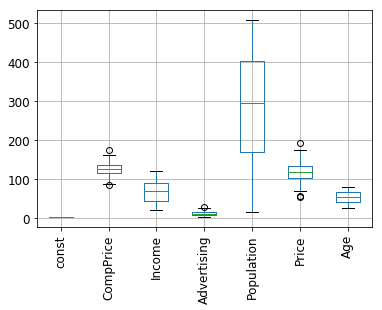

In [12]:
X_.boxplot(rot = 90)
plt.show()

In [13]:
influence     = model.get_influence()  
resid_student = influence.resid_studentized_external

In [14]:
all(x > 3 for x in resid_student) 

False

In [15]:
resid = pd.concat([X_, pd.Series(resid_student,name = "Studentized Residuals")],axis = 1)
resid.head()

,const,CompPrice,Income,Advertising,Population,Price,Age,Studentized Residuals
0,1.0,138.0,73.0,11.0,276.0,120.0,42.0,0.022993
1,1.0,111.0,48.0,16.0,260.0,83.0,65.0,0.791737
2,1.0,113.0,35.0,10.0,269.0,80.0,59.0,0.347843
3,1.0,117.0,100.0,4.0,466.0,97.0,55.0,-0.461685
4,1.0,141.0,64.0,3.0,340.0,128.0,38.0,-1.898464


If the absolute value of studentized residuals is more than 3 then that observation is considered as an outlier and hence should be removed.

In [16]:
print(X_[np.absolute(resid['Studentized Residuals'] > 3)]) 

Empty DataFrame
Columns: [const, CompPrice, Income, Advertising, Population, Price, Age]
Index: []


D:\Python\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### There are no outliers

### 2) No multi-collinearity

https://www.listendata.com/2018/01/linear-regression-in-python.html

Multi-collinearity increases the estimate of standard error of regression coefficients which makes some variables statistically insignificant when they should be significant.

We can detect multi-collinearity by:
+ By plotting scatter plots between predictor variables to have a visual description of their relationship.
+ By calculating the correlation coefficients between the variables we learn the extent of multi-collinearity in the data.
+ By calculating the Variable Inflation Factor (VIF) for each variable. 
VIF measures how much the variance of an estimated regression coefficients increases if your predictors are correlated.  The higher the value of VIF for the regressor, the more it is highly correlated to other variables.

VIF for a predictor variable is given by $\frac{1}{1 - R^2}$.
Here we take one of the explanatory variables as the target variable and all others as independent variables. So we run a regression between one of those independent variables with remaining independent variables. 

####  Detecting and Removing Multicollinearity 

##### We use the statsmodels library to calculate VIF

In [17]:
def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)


In [18]:
X_pure = calculate_vif(X) 

Iteration no.
1
[57.06271949848049, 6.653588140435617, 4.848279748733822, 5.096113546463158, 40.51186561632322, 10.250281196064424]
Max VIF is for variable no.:
0
Iteration no.
2
[6.345088171250674, 4.816738460132506, 5.05301790070827, 11.010622421977132, 8.615701106010986]
Max VIF is for variable no.:
3
Iteration no.
3
[5.6508155528195205, 4.630467807111045, 4.743183330815087, 6.342832468311356]
Max VIF is for variable no.:
3
Iteration no.
4
[4.077115860865225, 4.255987140390556, 4.416626008438578]
Max VIF is for variable no.:
2


In [19]:
X_pure.shape 

(256, 3)

In [20]:
X_pure.head()

,Income,Advertising,Population
0,73,11.0,276
1,48,16.0,260
2,35,10.0,269
3,100,4.0,466
4,64,3.0,340


#### There is no multi-collinearity as their value is below 5

### 3) Constant variance

Checking heteroscedasticity Using Goldfeld Quandt we test for heteroscedasticity.
Null Hypothesis: Error terms are homoscedastic
Alternative Hypothesis: Error terms are heteroscedastic.

In [21]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

[('F statistic', 1.1007029411836813), ('p-value', 0.29926013300702936)]

The p-value is 0.2993 hence we can say that the residuals have constant variance. 

### 4) No autocorrelation

#### Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.

####  Null Hypothesis: Autocorrelation is absent.
#### Alternative Hypothesis: Autocorrelation is present.

In [22]:
diag.acorr_ljungbox(model.resid, lags = 1) 

(array([0.0339155]), array([0.85388666]))

Since p-value is 0.8539 thus we can accept the null hypothesis and can say that autocorrelation is absent.

### 5) Normality of the residuals

#### We use Jarque-Bera test  from scipy library to check the normality of residuals.

#### Null Hypothesis: The residuals are normally distributed.

####  Alternative Hypothesis: The residuals are not normally distributed.

In [23]:
jb_stat, jb_pval = stats.jarque_bera(model.resid)
print('Jarque-Bera test P value is %1.4f' % jb_pval)

Jarque-Bera test P value is 0.0503


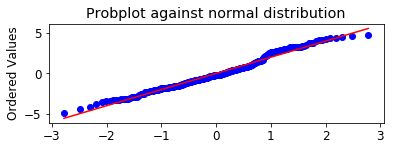

In [24]:
fig     = plt.figure()
ax1     = fig.add_subplot(211)
prob    = stats.probplot(model.resid, dist = stats.norm, plot = ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
plt.show()

D:\Python\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


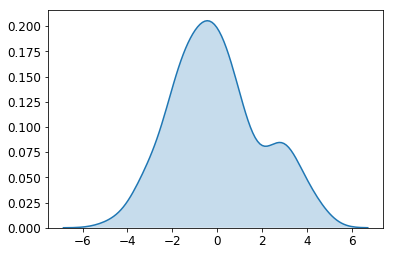

In [25]:
sns.kdeplot(model.resid, shade=True);
plt.show()

## The residuals are normally distributed since the p-value (0.0503) is >  0.05

https://dataunderthehood.com/2018/01/15/box-cox-transformation-with-python/

https://www.listendata.com/2018/01/linear-regression-in-python.html

### 6) Linearity

The residual vs fitted values plot is used to check for constant variance and linearity, and to identify potential outliers in the data.

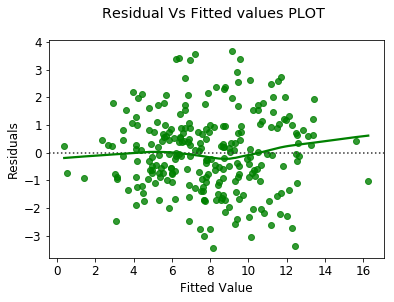

In [26]:
residuals  =  model.resid
# Plot the residuals after fitting a linear model
ax         = sns.residplot(y, residuals, lowess = True, color = "g")

ax.set(xlabel='Fitted Value', ylabel='Residuals', title = 'Residual Vs Fitted values PLOT \n')
plt.show()

The residual plot indicates that the model’s residuals are restricting to mean of zero to a great extent exhibiting linearity.

### Split the data into train and test datasets

* Use the train data to build a model.
* Use the test data to evaluate the model performance.
* Slit the data into 80:20 ratio to create train and test data
* Set a random seed to ensure repeatability of the results

In [27]:
x_train, x_test,  y_train, y_test = train_test_split(X_pure, y, test_size = 0.30, random_state = 123)

In [28]:
x_train.var()

Income           760.237336
Advertising       29.305066
Population     19499.047392
dtype: float64

In [29]:
df_names      = ['x_train shape', 'x_test shape', 'y_train shape', 'y_test shape']
shapes        = (x_train.shape, x_test.shape,  y_train.shape, y_test.shape)
types         = (type(x_train), type(x_test), type(y_train),type(y_test))
lzip(df_names,shapes, types)

[('x_train shape', (179, 3), pandas.core.frame.DataFrame),
 ('x_test shape', (77, 3), pandas.core.frame.DataFrame),
 ('y_train shape', (179,), pandas.core.series.Series),
 ('y_test shape', (77,), pandas.core.series.Series)]

In [30]:
x_train_            = sm.add_constant(x_train)
lm                  = sm.OLS(y_train, x_train_, hasconst = False).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     353.4
Date:                Thu, 30 May 2019   Prob (F-statistic):           1.18e-82
Time:                        07:10:34   Log-Likelihood:                -434.61
No. Observations:                 179   AIC:                             877.2
Df Residuals:                     175   BIC:                             890.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.6019      0.746      7.507      

The regression equation is given by:

Sales = 3.86577 + 0.09269 * TV + 0.03462 * Radio + 0.01597 * Newspaper -0.000466 * $TV^2$ + 0.0015105 * TV X Radio - 0.0002586 * TV X Newspaper - 9.39196 * $Radio^2$ - 0.0007483 X Radio X Newspaper + 0.0002933 * $Newspaper^2$  + 0.000000081533 * $TV^3$ - 0.0000016885 * $TV^2$ X Radio - 0.00000100052 * $TV^2$ X Newspaper - 0.0000023998 * $Radio^2$ X TV - 0.00000198309 * $TV$ * $Radio$ * $Newspaper$ - 0.000000332817 * $Newspaper^2$ * TV - 0.00000907886 * $Radio^3$ + 0.0000097386 * $Radio^2$ * Newspaper + 0.0000052069 * $Newspaper^2$ X Radio - 0.000003027 * $Newspaper^3$ 

### Model evaluation

We will evaluate our model using RMSE, MAPE and R2-score.

### Prediction Accuracy

Prediction error or residuals is the difference between the predicted target variable values and the actual target variable vaues.

Most popular measure to evaluate the model performance is Root Mean Square Error (RMSE) which is the arithmatic mean of the sum of the residuals.

The model with low RMSE is the best model among many other models.

In [31]:
# model evaluation for training set

y_train_predict       = lm.predict(x_train_)

rmse_train            = np.sqrt(mean_squared_error(y_train, y_train_predict))
mape_train            = mean_absolute_percentage_error(y_train, y_train_predict)

print("The model performance for training set")

print("--------------------------------------")

print('RMSE is {}'.format(rmse_train))

print('MAPE is {}'.format(mape_train))
print('R square is %1.3f' % lm.rsquared_adj)



The model performance for training set
--------------------------------------
RMSE is 2.742939768436438
MAPE is 51.898063907378145
R square is 0.887


In [32]:
print("\n")

print("The model performance for testing set")

print("--------------------------------------")

# model evaluation for testing set
x_test_                  =   sm.add_constant(x_test) 
y_test_predict           =   lm.predict(x_test_)
rmse_test                =   (np.sqrt(mean_squared_error(y_test, y_test_predict)))
mape_test                =   mean_absolute_percentage_error(y_test, y_test_predict)

print('RMSE is {}'.format(rmse_test))
print('MAPE is {}'.format(mape_test))



The model performance for testing set
--------------------------------------
RMSE is 2.527087936100166
MAPE is 31.19889516627319


Let us see if ridge or lasso regression is better.

### Ridge Regression

For ridge regression, we introduce GridSearchCV, which allow us to automatically perform 5-fold cross-validation with a range of different regularization parameters in order to find the optimal value of alpha.
Ref: https://towardsdatascience.com/how-to-perform-lasso-and-ridge-regression-in-python-3b3b75541ad8

In [33]:
ridge    =  Ridge()

In [34]:
param_dict      =  {'alpha' : [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 20, 30]}
ridge_regressor =  GridSearchCV(ridge, param_dict, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [35]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 30}
-7.907627693595195


In [36]:
clf = Ridge(alpha = 30,  fit_intercept = False, random_state = 12345)
clf.fit(x_train, y_train)

Ridge(alpha=30, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=12345, solver='auto', tol=0.001)

## Get the coefficients of the Ridge model

In [37]:
coef_dict_ridge = {}
for coef, feat in zip(clf.coef_, x_train.columns):
    coef_dict_ridge[feat] = coef
print(coef_dict_ridge)

{'Income': 0.05581005343607277, 'Advertising': 0.233099289677593, 'Population': 0.003755643825561731}


In [38]:
rmse_train_rr    = (np.sqrt(mean_squared_error(y_true = y_train, y_pred = clf.predict(x_train))))
mape_train_rr    = mean_absolute_percentage_error(y_train,y_pred = clf.predict(x_train))

print("\n")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE    is {}'.format(rmse_train_rr))
print('MAPE    is {}'.format(mape_train_rr))
print('Rsquare is {}'.format(clf.score(x_train, y_train)))



The model performance for training set
--------------------------------------
RMSE    is 3.1538410416705056
MAPE    is 50.637097069635814
Rsquare is -0.19838532727444716


In [39]:
rmse_test_rr    = (np.sqrt(mean_squared_error(y_true = y_test, y_pred = clf.predict(x_test))))
mape_test_rr    = mean_absolute_percentage_error(y_test, y_pred = clf.predict(x_test))

print("\n")
print("The model performance for testing set")
print("--------------------------------------")

print('RMSE is {}'.format(rmse_test_rr ))
print('MAPE is {}'.format(mape_test_rr ))



The model performance for testing set
--------------------------------------
RMSE is 3.010000648554031
MAPE is 32.792404198881655


In [40]:
lasso                      =  Lasso()

In [41]:
param_dict       =  {'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 20]}
lasso_regressor  =  GridSearchCV(lasso, param_dict, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [42]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-7.90898360649681


In [43]:
clf1 = Lasso(alpha = 0.01)
clf1.fit(x_train, y_train)
print('Rsquare is {}'.format(clf1.score(x_train, y_train)))

Rsquare is 0.09353793126674104


### Get the coefficients of the Lasso model

In [44]:
coef_dict_lasso = {}
for coef, feat in zip(clf1.coef_, x_train.columns):
    coef_dict_lasso[feat] = coef
print(coef_dict_lasso)

{'Income': 0.018837704682000585, 'Advertising': 0.12551621502800483, 'Population': -0.0015559806441731389}


In [45]:
rmse_train_lasso    = (np.sqrt(mean_squared_error(y_true = y_train, y_pred = clf1.predict(x_train))))
mape_train_lasso    = mean_absolute_percentage_error(y_train,y_pred = clf1.predict(x_train))

print("\n")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train_lasso ))
print('MAPE is {}'.format(mape_train_lasso ))



The model performance for training set
--------------------------------------
RMSE is 2.7429404354200293
MAPE is 51.9008656897307


In [46]:
rmse_test_lasso    = (np.sqrt(mean_squared_error(y_true = y_test, y_pred = clf1.predict(x_test))))
mape_test_lasso    = mean_absolute_percentage_error(y_test, y_pred = clf1.predict(x_test))

print("\n")
print("The model performance for testing set")
print("--------------------------------------")

print('RMSE is {}'.format(rmse_test_lasso ))
print('MAPE is {}'.format(mape_test_lasso ))



The model performance for testing set
--------------------------------------
RMSE is 2.527155835832308
MAPE is 31.20032956219824


### Decision Trees (CART)

Decision trees or the Classification and Regression Trees (CART as they are known) use the training data to select the best points to split the data in order to minimize a cost metric. The default cost metric for regression decision trees is the mean squared error, specified in the criterion parameter.

You can create a CART model for regression using the DecisionTreeRegressor class.

For more details, refer https://machinelearningmastery.com/spot-check-regression-machine-learning-algorithms-python-scikit-learn/

In [47]:
X                      =   x_train
Y                      =   y_train
seed                   =   12345

## Create and fit the model

kfold                  = model_selection.KFold(n_splits = 10, random_state = seed)
model                  = DecisionTreeRegressor()
model.fit(x_train, y_train)  

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [48]:
### Predict from the model for training data

y_pred      =  model.predict(x_train)

print('Type of y_pred is %s' % type(y_pred))

print('\n Compare the difference between the actual and predicted values.')

df          =  pd.DataFrame({'Actual':y_train, 'Predicted':y_pred})  
print(df.head(5).T)

Type of y_pred is <class 'numpy.ndarray'>

 Compare the difference between the actual and predicted values.
           218   223  285    352    82 
Actual     9.7  3.45  7.6  13.44  11.62
Predicted  9.7  3.45  7.6  13.44  11.62


In [49]:
rmse_train_CART    = (np.sqrt(mean_squared_error(y_true = y_train, y_pred = model.predict(x_train))))
mape_train_CART    = mean_absolute_percentage_error(y_train,y_pred = model.predict(x_train))
score              = model.score(x_train, y_train)


print("\n")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train_CART))
print('MAPE is {}'.format(mape_train_CART))
print('R Square is {}'.format(score))




The model performance for training set
--------------------------------------
RMSE is 0.0
MAPE is 0.0
R Square is 1.0


In [62]:
coef_dict_CART = {}
for coef, feat in zip(model.coef_, x_train.columns):
    coef_dict_CART[feat] = coef
print(coef_dict_CART)

AttributeError: coef_ is only available when using a linear kernel

In [50]:
### Predict from the model for testing data

y_pred      =  model.predict(x_test)

print('Type of y_pred is %s' % type(y_pred))

print('\n Compare the difference between the actual and predicted values.')

df1          =  pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
print(df1.head(5).T)

Type of y_pred is <class 'numpy.ndarray'>

 Compare the difference between the actual and predicted values.
            52     132    178    328   311
Actual     7.91   9.54  10.66   3.15  6.15
Predicted  5.71  10.04   6.37  11.27  7.80


In [51]:
rmse_test_CART    = (np.sqrt(mean_squared_error(y_true = y_test, y_pred = model.predict(x_test))))
mape_test_CART    = mean_absolute_percentage_error(y_test, y_pred = model.predict(x_test))

print("\n")
print("The model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test_CART))
print('MAPE is {}'.format(mape_test_CART))



The model performance for test set
--------------------------------------
RMSE is 4.306215531971455
MAPE is 52.01437904814158


http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html
https://theprofessionalspoint.blogspot.com/2019/02/implement-decision-tree-algorithm-in_22.html

### K-Nearest Neighbors (or KNN)

K-Nearest Neighbors (or KNN) locates the K most similar instances in the training dataset for a new data instance. From the K neighbors, a mean or median output variable is taken as the prediction. Of note is the distance metric used (the metric argument). The Minkowski distance is used by default, which is a generalization of both the Euclidean distance (used when all inputs have the same scale) and Manhattan distance (for when the scales of the input variables differ).
You can construct a KNN model for regression using the KNeighborsRegressor class.

In [52]:
seed                   =  12345
kfold                  =  model_selection.KFold(n_splits = 10, random_state = seed)
model                  =  KNeighborsRegressor()
scoring                =  'neg_mean_squared_error'
model.fit(x_train, y_train)  

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [53]:
### Predict from the model for training data

y_pred      =  model.predict(x_train)

print('Type of y_pred is %s' % type(y_pred))

print('\n Compare the difference between the actual and predicted values.')

df          =  pd.DataFrame({'Actual':y_train, 'Predicted':y_pred})  
print(df.head(5).T)

Type of y_pred is <class 'numpy.ndarray'>

 Compare the difference between the actual and predicted values.
            218    223    285     352     82 
Actual     9.70  3.450  7.600  13.440  11.620
Predicted  8.52  6.872  9.164   9.102   9.982


In [54]:
rmse_train_KNN     = (np.sqrt(mean_squared_error(y_true = y_train, y_pred = model.predict(x_train))))
mape_train_KNN     = mean_absolute_percentage_error(y_train,y_pred = model.predict(x_train))
score              = model.score(x_train, y_train)


print("\n")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train_KNN))
print('MAPE is {}'.format(mape_train_KNN))
print('R Square is {}'.format(score))



The model performance for training set
--------------------------------------
RMSE is 2.569607386918287
MAPE is 46.37627640434444
R Square is 0.20448123894511383


In [55]:
### Predict from the model for testing data

y_pred      =  model.predict(x_test)

print('Type of y_pred is %s' % type(y_pred))

print('\n Compare the difference between the actual and predicted values.')

df1          =  pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
print(df1.head(5).T)

Type of y_pred is <class 'numpy.ndarray'>

 Compare the difference between the actual and predicted values.
             52    132    178   328    311
Actual     7.910  9.54  10.66  3.15   6.15
Predicted  5.564  8.63   5.92  9.29  10.43


In [56]:
rmse_test_KNN    = (np.sqrt(mean_squared_error(y_true = y_test, y_pred = model.predict(x_test))))
mape_test_KNN    = mean_absolute_percentage_error(y_test, y_pred = model.predict(x_test))

print("\n")
print("The model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test_KNN ))
print('MAPE is {}'.format(mape_test_KNN))



The model performance for test set
--------------------------------------
RMSE is 3.036332545139831
MAPE is 36.30056246423688


### Support Vector Machines - Regression

Support Vector Machines (SVM) were developed for binary classification. The technique has been extended for the prediction real-valued problems called Support Vector Regression (SVR). Like the classification example, SVR is built upon the LIBSVM library.
You can create an SVM model for regression using the SVR class.

In [57]:
seed                =  12345
kfold               =  model_selection.KFold(n_splits=10, random_state=seed)
model               =  SVR()
scoring             =  'neg_mean_squared_error'

model_selection.cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
model.fit(x_train, y_train)  

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [58]:
### Predict from the model for training data

y_pred      =  model.predict(x_train)

print('Type of y_pred is %s' % type(y_pred))

print('\n Compare the difference between the actual and predicted values.')

df          =  pd.DataFrame({'Actual':y_train, 'Predicted':y_pred})  
print(df.head(5).T)

Type of y_pred is <class 'numpy.ndarray'>

 Compare the difference between the actual and predicted values.
                218       223       285        352        82 
Actual     9.700000  3.450000  7.600000  13.440000  11.620000
Predicted  8.652196  6.650924  7.650924   8.650924   8.649651


In [59]:
rmse_train_SVR     = (np.sqrt(mean_squared_error(y_true = y_train, y_pred = model.predict(x_train))))
mape_train_SVR     = mean_absolute_percentage_error(y_train,y_pred = model.predict(x_train))
score              = model.score(x_train, y_train)

print("\n")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train_SVR ))
print('MAPE is {}'.format(mape_train_SVR))
print('R Square is {}'.format(score))



The model performance for training set
--------------------------------------
RMSE is 2.1249271342062652
MAPE is 38.838459595765976
R Square is 0.45599240046988


In [60]:
### Predict from the model for testing data

y_pred      =  model.predict(x_test)

print('Type of y_pred is %s' % type(y_pred))

print('\n Compare the difference between the actual and predicted values.')

df1          =  pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
print(df1.head(5).T)

Type of y_pred is <class 'numpy.ndarray'>

 Compare the difference between the actual and predicted values.
                52        132       178       328       311
Actual     7.910000  9.540000  10.66000  3.150000  6.150000
Predicted  7.650924  7.650924   7.65092  7.650969  7.650924


In [61]:
rmse_test_SVR    = (np.sqrt(mean_squared_error(y_true = y_test, y_pred = model.predict(x_test))))
mape_test_SVR    = mean_absolute_percentage_error(y_test, y_pred = model.predict(x_test))

print("\n")
print("The model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test_SVR ))
print('MAPE is {}'.format(mape_test_SVR))



The model performance for test set
--------------------------------------
RMSE is 2.6589742463445756
MAPE is 32.9176257675829
